# Prophet Model Evaluation Using Diagnostic Tools of Prophet Library

In [1]:
import numpy as np
import pandas as pd

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Daily_Sales.csv")

In [3]:
df.head()

,date,sales
0,2013-01-01,12
1,2013-01-02,16
2,2013-01-03,16
3,2013-01-04,20
4,2013-01-05,16


In [4]:
df.shape

(1826, 2)

In [5]:
df.columns = ["ds", "y"]

In [6]:
df.head()

,ds,y
0,2013-01-01,12
1,2013-01-02,16
2,2013-01-03,16
3,2013-01-04,20
4,2013-01-05,16


In [7]:
df.isna().sum()

ds    0
y     0
dtype: int64

In [8]:
df["ds"] = pd.to_datetime(df["ds"])

In [9]:
df.head()

,ds,y
0,2013-01-01,12
1,2013-01-02,16
2,2013-01-03,16
3,2013-01-04,20
4,2013-01-05,16


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1826 non-null   datetime64[ns]
 1   y       1826 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 28.7 KB


<AxesSubplot:xlabel='ds'>

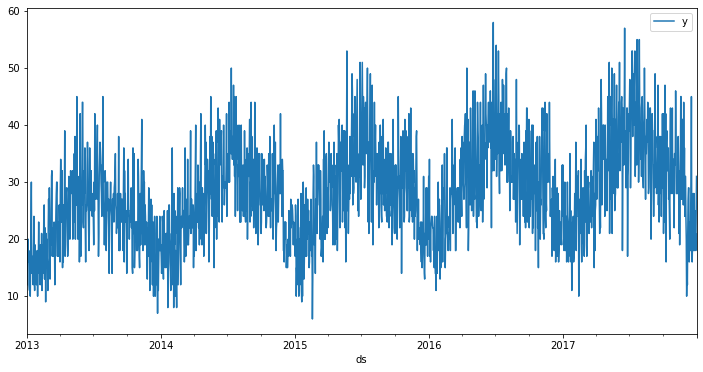

In [11]:
df.plot(x= "ds", y= "y", figsize= (12,6))

### Train Test Split:

In [12]:
len(df)

1826

In [13]:
train_data = df[:1461]
test_data = df[1461:]

In [14]:
train_data.shape

(1461, 2)

In [15]:
test_data.shape

(365, 2)

### Prophet Model:

In [16]:
model = Prophet()

In [17]:
model.fit(train_data)

02:39:48 - cmdstanpy - INFO - Chain [1] start processing
02:39:49 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future_df = model.make_future_dataframe(periods= 365)

In [19]:
future_df.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [20]:
future_df.tail()

,ds
1821,2017-12-27
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31


In [21]:
forecast = model.predict(future_df)

In [23]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,22.143936,5.870942,19.393057,22.143936,22.143936,-9.261813,-9.261813,-9.261813,-2.125579,-2.125579,-2.125579,-7.136234,-7.136234,-7.136234,0.0,0.0,0.0,12.882123
1,2013-01-02,22.151857,5.955458,19.133458,22.151857,22.151857,-9.774131,-9.774131,-9.774131,-2.643965,-2.643965,-2.643965,-7.130166,-7.130166,-7.130166,0.0,0.0,0.0,12.377727
2,2013-01-03,22.159779,7.944342,21.791320,22.159779,22.159779,-7.208090,-7.208090,-7.208090,-0.071258,-0.071258,-0.071258,-7.136832,-7.136832,-7.136832,0.0,0.0,0.0,14.951689
3,2013-01-04,22.167700,10.278692,23.891061,22.167700,22.167700,-4.888359,-4.888359,-4.888359,2.267006,2.267006,2.267006,-7.155366,-7.155366,-7.155366,0.0,0.0,0.0,17.279341
4,2013-01-05,22.175621,12.069662,25.171078,22.175621,22.175621,-3.560263,-3.560263,-3.560263,3.624381,3.624381,3.624381,-7.184643,-7.184643,-7.184643,0.0,0.0,0.0,18.615359


In [24]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1821,2017-12-27,33.275283,16.278661,30.395517,33.185986,33.372638,-10.028310,-10.028310,-10.028310,-2.643965,-2.643965,-2.643965,-7.384346,-7.384346,-7.384346,0.0,0.0,0.0,23.246973
1822,2017-12-28,33.280410,19.006975,32.229786,33.190758,33.378100,-7.381842,-7.381842,-7.381842,-0.071258,-0.071258,-0.071258,-7.310585,-7.310585,-7.310585,0.0,0.0,0.0,25.898567
1823,2017-12-29,33.285536,21.444349,35.366872,33.195530,33.383563,-4.981383,-4.981383,-4.981383,2.267006,2.267006,2.267006,-7.248390,-7.248390,-7.248390,0.0,0.0,0.0,28.304152
1824,2017-12-30,33.290662,22.781342,36.301155,33.200302,33.389025,-3.574450,-3.574450,-3.574450,3.624381,3.624381,3.624381,-7.198831,-7.198831,-7.198831,0.0,0.0,0.0,29.716211
1825,2017-12-31,33.295788,22.967846,36.880591,33.205073,33.394488,-3.136347,-3.136347,-3.136347,4.026211,4.026211,4.026211,-7.162558,-7.162558,-7.162558,0.0,0.0,0.0,30.159441


In [25]:
test_data.tail()

,ds,y
1821,2017-12-27,19
1822,2017-12-28,21
1823,2017-12-29,18
1824,2017-12-30,24
1825,2017-12-31,31


<AxesSubplot:xlabel='ds'>

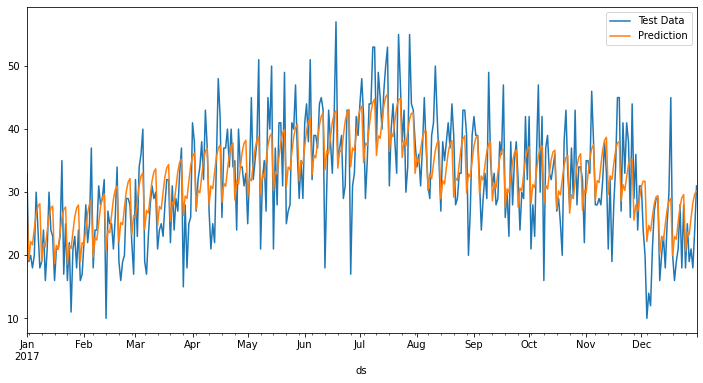

In [28]:
# Plotting Test Data and Predictions:

ax= test_data.plot(x= "ds", y= "y", label= "Test Data", legend= True, figsize= (12,6))
forecast[-365:][["ds", "yhat"]].plot(x= "ds", y= "yhat", label= "Prediction", legend= True, ax= ax)

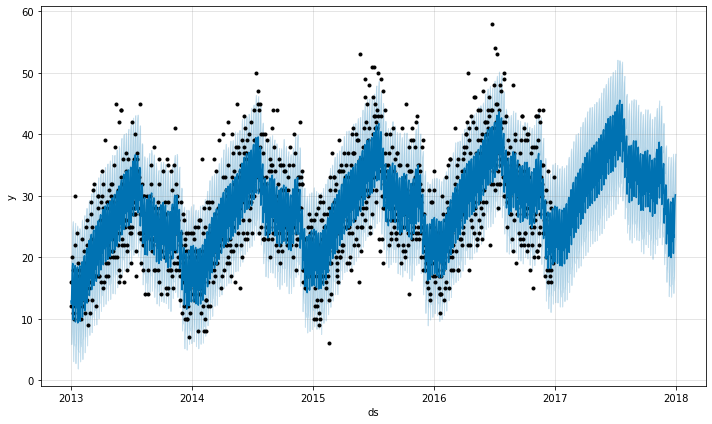

In [41]:
model.plot(forecast);

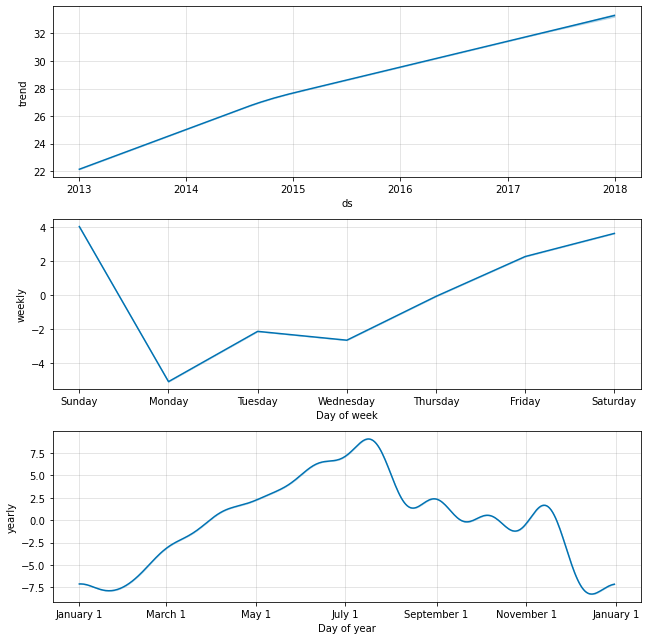

In [44]:
model.plot_components(forecast);

In [29]:
# Model Evaluation Using Root Mean Squared Error:

np.sqrt(mean_squared_error(test_data["y"], forecast[-365:]["yhat"]))

5.800661874338953

### Diagnostics Using Prophet Cross Validation and Performance Metrics:

In [32]:
df_cv = cross_validation(model, initial="730 days", horizon="90 days", period= "45 days",)

  0%|          | 0/15 [00:00<?, ?it/s]

02:52:14 - cmdstanpy - INFO - Chain [1] start processing
02:52:14 - cmdstanpy - INFO - Chain [1] done processing
02:52:15 - cmdstanpy - INFO - Chain [1] start processing
02:52:15 - cmdstanpy - INFO - Chain [1] done processing
02:52:16 - cmdstanpy - INFO - Chain [1] start processing
02:52:16 - cmdstanpy - INFO - Chain [1] done processing
02:52:17 - cmdstanpy - INFO - Chain [1] start processing
02:52:17 - cmdstanpy - INFO - Chain [1] done processing
02:52:17 - cmdstanpy - INFO - Chain [1] start processing
02:52:18 - cmdstanpy - INFO - Chain [1] done processing
02:52:18 - cmdstanpy - INFO - Chain [1] start processing
02:52:18 - cmdstanpy - INFO - Chain [1] done processing
02:52:19 - cmdstanpy - INFO - Chain [1] start processing
02:52:19 - cmdstanpy - INFO - Chain [1] done processing
02:52:20 - cmdstanpy - INFO - Chain [1] start processing
02:52:20 - cmdstanpy - INFO - Chain [1] done processing
02:52:21 - cmdstanpy - INFO - Chain [1] start processing
02:52:21 - cmdstanpy - INFO - Chain [1]

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-12,16.993373,11.420939,23.473208,10,2015-01-11
1,2015-01-13,20.097986,13.683888,26.161257,20,2015-01-11
2,2015-01-14,19.949223,13.709359,26.437871,13,2015-01-11
3,2015-01-15,22.425452,15.995754,28.696926,12,2015-01-11
4,2015-01-16,23.978917,17.834097,29.788552,22,2015-01-11


In [34]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1345,2016-12-27,22.668354,15.650015,29.503578,19,2016-10-02
1346,2016-12-28,22.175528,15.701230,28.974232,25,2016-10-02
1347,2016-12-29,24.726354,17.687790,31.416190,25,2016-10-02
1348,2016-12-30,26.983530,20.869060,33.913524,33,2016-10-02
1349,2016-12-31,28.416267,21.405434,34.543290,24,2016-10-02


In [35]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,35.828186,5.985665,4.885620,0.188932,0.144642,0.171841,0.674074
1,10 days,34.927664,5.909963,4.839722,0.182765,0.140090,0.167784,0.703704
2,11 days,35.605300,5.967018,4.880314,0.192963,0.139975,0.173440,0.703704
3,12 days,37.793153,6.147614,4.992487,0.196807,0.143058,0.176188,0.696296
4,13 days,35.954019,5.996167,4.784119,0.189183,0.138900,0.169489,0.703704
...,...,...,...,...,...,...,...,...
77,86 days,35.229876,5.935476,4.887198,0.174381,0.150383,0.165821,0.748148
78,87 days,36.291387,6.024233,4.934110,0.174034,0.148070,0.165504,0.748148
79,88 days,35.797902,5.983135,4.836041,0.167620,0.147130,0.159912,0.725926
80,89 days,36.586043,6.048640,4.835133,0.167389,0.146292,0.159007,0.725926


C:\ProgramData\Anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\ProgramData\Anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


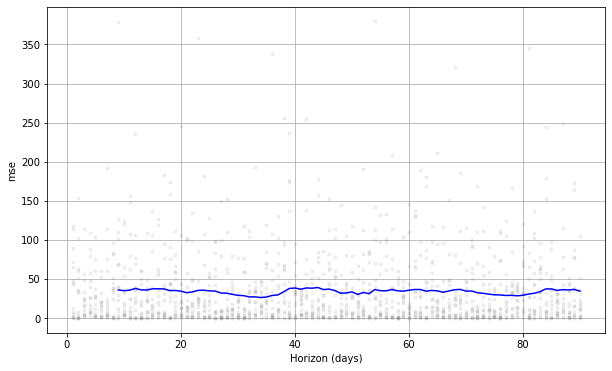

In [37]:
plot_cross_validation_metric(df_cv, metric= "mse");

C:\ProgramData\Anaconda3\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\ProgramData\Anaconda3\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


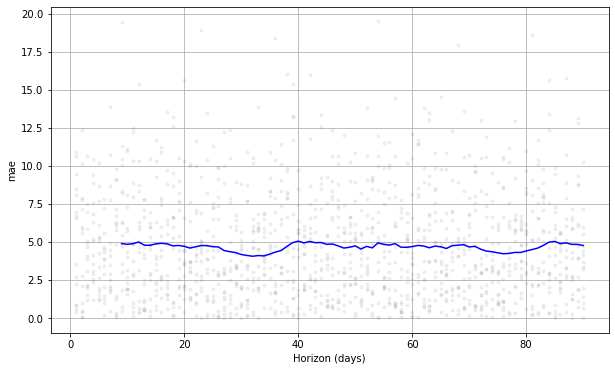

In [39]:
plot_cross_validation_metric(df_cv, metric= "mae");